# Modulation transfer function (MTF)

In [1]:
from diffractio import np, plt
from diffractio import mm, um
from diffractio.diffractio import Diffractio

from diffractio.utils_optics import MTF_ideal, get_MTF_frequency

## MTF for 1D scalar fields

**Intensity distribution at focus**

In [2]:
wavelength=0.6328*um
num_data = 1024*32 

size = .25*mm
x0=np.linspace(-size/2, size/2, num_data)


In [3]:
u0 = Diffractio('scalar', 'source', x=x0,  wavelength=wavelength)
u0.plane_wave()

In [4]:
radius_lens = size/2
focal = 1 * mm
d_focal = 0 *mm
distance = focal + d_focal


In [5]:
t_lens = Diffractio('scalar', 'mask', x=x0, wavelength= wavelength)
t_lens.lens(x0=0, radius=radius_lens, focal=focal)

Good result: factor 327.88


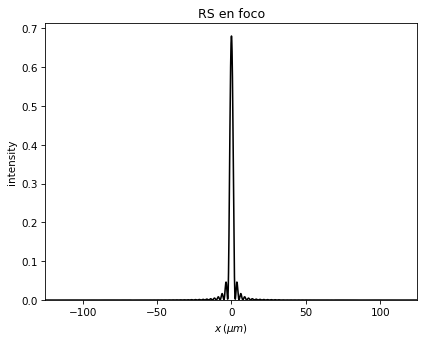

In [6]:
# focused light beam 
u1 = u0 * t_lens

u2_x = u1.RS(z=distance)
u2_x.draw(logarithm=1e-2)

plt.title("RS en foco")

frequency cut = 395.07 lines/mm


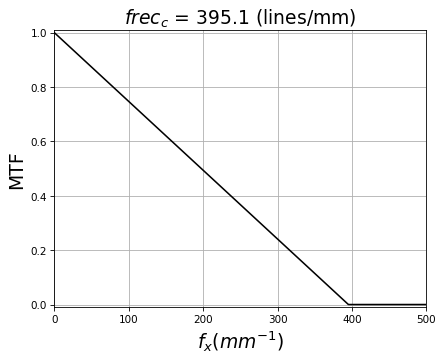

In [7]:
# Ideal MTF
freqs = np.linspace(0, 500, 600)  # in cycles/mm

mtf_ideal, freq_corte = MTF_ideal(frequencies = freqs, wavelength=wavelength, diameter=2*radius_lens,
                                    focal=focal, kind="1D", has_draw=True, verbose=True)

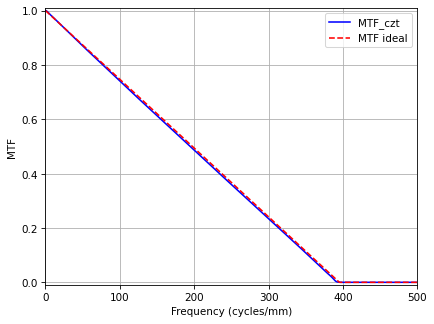

In [8]:
fd_czt_1d, mtf_czt_1d = u2_x.MTF(freqs, incoherent=True, has_draw=True)
plt.plot(freqs, mtf_ideal, 'r--', label='MTF ideal'); plt.legend()

**Intensity distribution out-of-focus**

Good result: factor 334.21


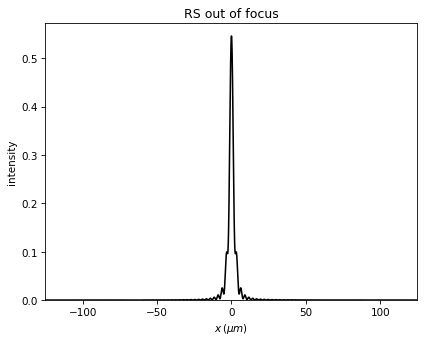

In [9]:
u1 = u0 * t_lens

u3_x = u1.RS(z=distance+20*um)
u3_x.draw(logarithm=1e-2)

plt.title("RS out of focus")

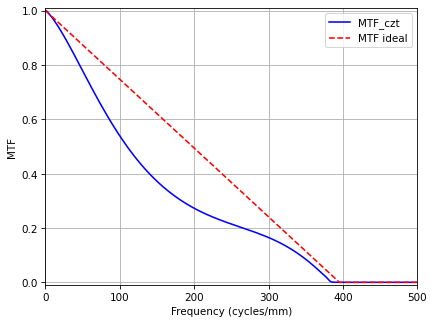

In [10]:
fd_czt_1d, mtf_czt_1d = u3_x.MTF(freqs, incoherent=True, has_draw=True)
plt.plot(freqs, mtf_ideal, 'r--', label='MTF ideal'); plt.legend()

## MTF for 2D scalar fields

**Intensity distribution at focus**

In [27]:
wavelength=0.6328*um
num_data = 1024 

size = 1*mm
x0=np.linspace(-size/2, size/2, num_data)
y0=np.linspace(-size/2, size/2, num_data)

In [28]:
u0 = Diffractio('scalar', 'source', x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

In [29]:
radius_lens = size/2
focal = 50 * mm

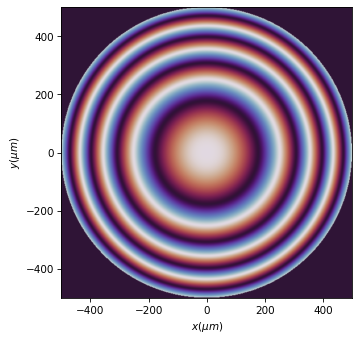

In [30]:
t_lens = Diffractio('scalar', 'mask', x=u0.x, y=u0.y, wavelength=u0.wavelength)
t_lens.lens(r0=(0, 0), radius=radius_lens, focal=(focal, focal))
t_lens.pupil()
t_lens.draw(kind='phase', percentage_intensity=1e-6)

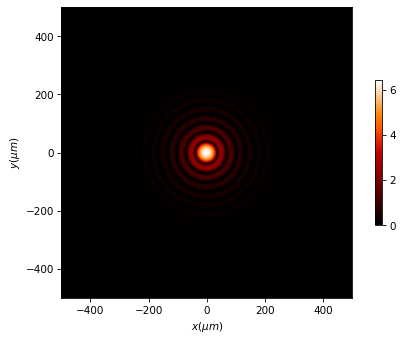

In [31]:
u1_xy = u0 * t_lens
u2_xy = u1_xy.CZT(z=focal, xout=u0.x, yout=u0.y)
u2_xy.draw(logarithm=1e0, has_colorbar='vertical')

**Ideal MTF (profile)**

frequency cut = 31.61 lines/mm


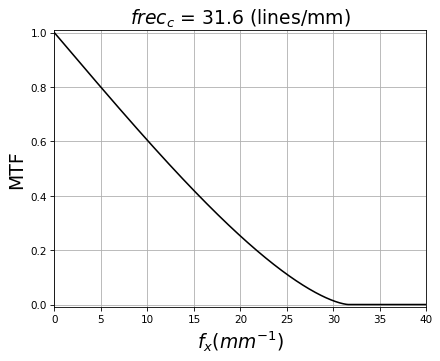

In [32]:

freqs_2d = np.linspace(0, 40, 600)  # in cycles/mm

mtf_ideal_2d, freq_corte_2d = MTF_ideal( frequencies= freqs_2d,  wavelength=wavelength, diameter=2*radius_lens, 
                                  focal=focal, kind="2D", has_draw=True, verbose=True)


**MTF profiles for plane wavefront**

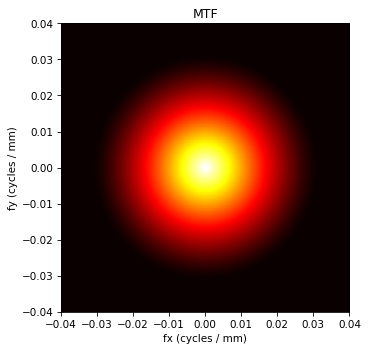

In [33]:
# Example 

fx = np.linspace(-40, 40, 200)
fy = np.linspace(-40, 40, 200)

mtf2d = u2_xy.MTF(fx, fy, incoherent=True, has_draw=True)


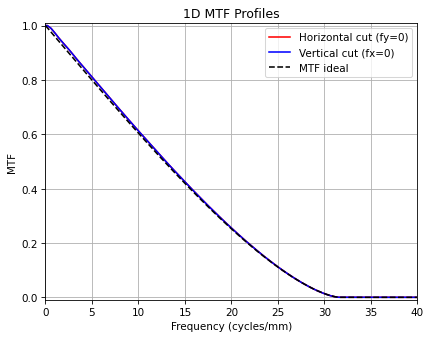

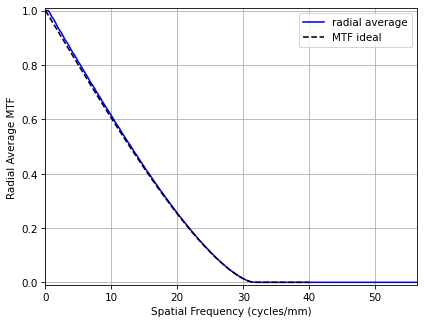

In [34]:
(fx,horiz),(fy,vert),(fr,mtf_rad) = u2_xy.MTF_profiles(fx,fy,incoherent=True, 
                                                       has_draw = True, mtf_ideal = (freqs_2d, mtf_ideal_2d))



**MTF profiles**

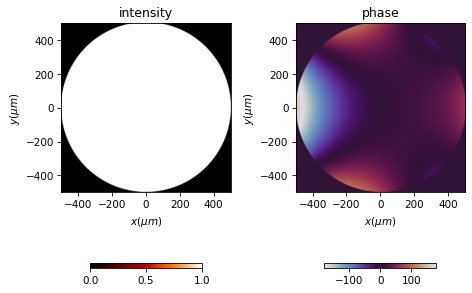

In [35]:
u0 = Diffractio('scalar', 'source', x=x0, y=y0, wavelength=wavelength)
u0.zernike_beam(A= 1, r0=(0*um, 0*um), radius=size/2, n=[1, 2, 3], m=[1, 2, 3,], c_nm=[.5, -.51, .5])
u0.pupil()
u0.draw('field')

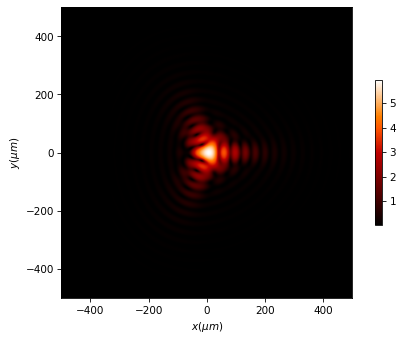

In [36]:
u1_xy = u0 * t_lens
u2_xy = u1_xy.CZT(z=focal, xout=u0.x, yout=u0.y)
u2_xy.draw(logarithm=1e0, has_colorbar='vertical')

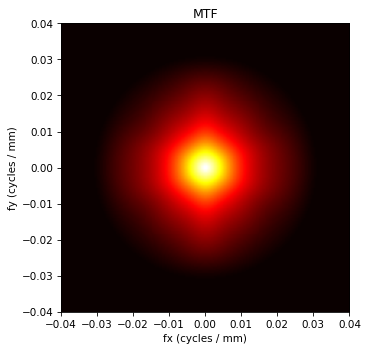

In [37]:
# Example 

fx = np.linspace(-40, 40, 200)
fy = np.linspace(-40, 40, 200)

mtf2d = u2_xy.MTF(fx, fy, incoherent=True, has_draw=True)


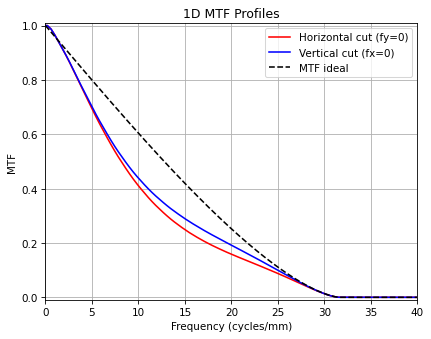

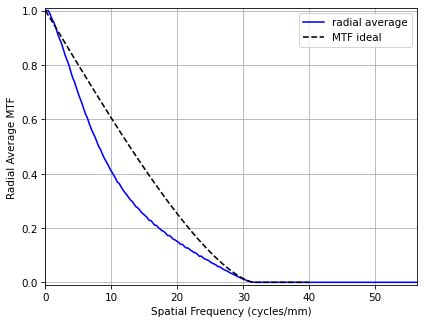

In [38]:
(fx,horiz),(fy,vert),(fr,mtf_rad) = u2_xy.MTF_profiles(fx,fy,incoherent=True, 
                                                       has_draw = True, mtf_ideal = (freqs_2d, mtf_ideal_2d))



## Get frequency at which MTF drops to a given value

frequency at MTF = 0.5: 8.0610 cycles/mm


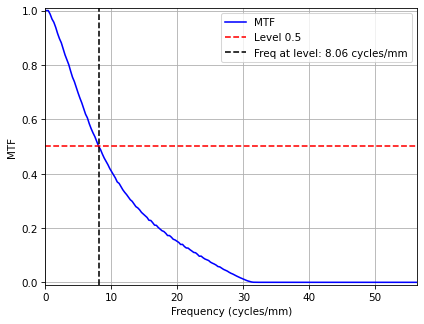

In [39]:
level = 0.5
MTF_frec = get_MTF_frequency(fr, mtf_rad, level= level, has_draw=True, verbose=True)
